### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",999)

In [3]:
pd.set_option("display.max_rows",85)

<br>

### Importing Data

In [4]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train.shape

(1460, 81)

In [8]:
df_test.shape

(1459, 80)

<rb>

### Data Understanding & Cleaning

In [9]:
### checking columns with null values
null_df = round((df_train.isnull().sum() *100 / df_train.shape[0]),2).sort_values(ascending=False)
null_df[null_df > 0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [10]:
### droppping columns from both train and set having more than 40% null value
df_train.drop(columns=null_df[null_df > 40].index , inplace=True)
df_test.drop(columns=null_df[null_df > 40].index , inplace=True)
print(df_train.shape)
print("\n" , df_test.shape)

(1460, 76)

 (1459, 75)


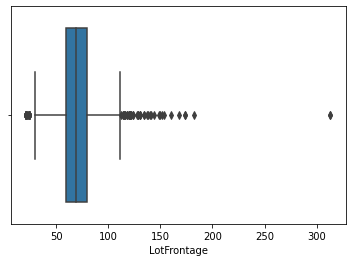

In [11]:
### checking LotFrontage column for data imputation
sns.boxplot(df_train.LotFrontage)
plt.show()

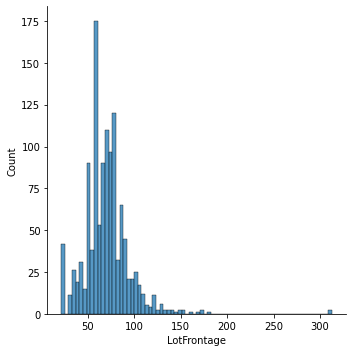

In [12]:
sns.displot(df_train.LotFrontage)

In [13]:
### best to impute LotFrontage with median values
df_train.LotFrontage.fillna(df_train.LotFrontage.median() , inplace=True)
df_train.LotFrontage.isnull().sum()

0

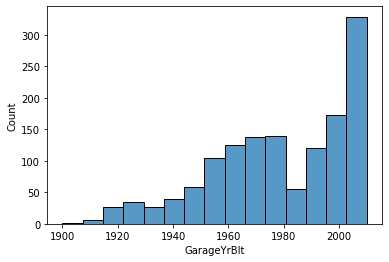

In [14]:
### checking GarageYrBlt column for data imputation
sns.histplot(df_train.GarageYrBlt)
plt.show()

In [15]:
### best to impute GarageYrBlt with mode values
df_train.GarageYrBlt.fillna(df_train.GarageYrBlt.mode()[0] , inplace=True)
df_train.GarageYrBlt.isnull().sum()

0

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

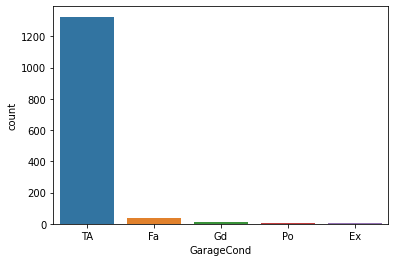

In [16]:
### checking GarageCond column for data imputation
sns.countplot(df_train.GarageCond)

In [17]:
### best to impute GarageCond with mode values
df_train.GarageCond.fillna(df_train.GarageCond.mode()[0] , inplace=True)
df_train.GarageCond.isnull().sum()

0

In [18]:
### merging non-TA values as others in both Train and Test set
df_train.GarageCond = df_train.GarageCond.apply(lambda x: "Others" if x != 'TA' else x)
df_train.GarageCond.value_counts(dropna=False)

TA        1407
Others      53
Name: GarageCond, dtype: int64

In [19]:
df_test.GarageCond = df_test.GarageCond.apply(lambda x: "Others" if x != 'TA' else x)
df_test.GarageCond.value_counts(dropna=False)

TA        1328
Others     131
Name: GarageCond, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

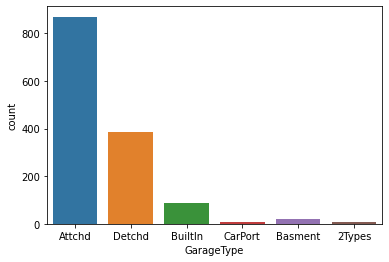

In [20]:
### checking GarageType column for data imputation
sns.countplot(df_train.GarageType)

In [21]:
### best to impute GarageType with mode values
df_train.GarageType.fillna(df_train.GarageType.mode()[0] , inplace=True)
df_train.GarageType.isnull().sum()

0

In [22]:
### merging non-Attchd and non-Detchd values as others in both Train and Test set
df_train.GarageType = df_train.GarageType.apply(lambda x: "Others" if (x != 'Attchd' and x != 'Detchd') else x)
df_train.GarageType.value_counts(dropna=False)

Attchd    951
Detchd    387
Others    122
Name: GarageType, dtype: int64

In [23]:
df_test.GarageType = df_test.GarageType.apply(lambda x: "Others" if (x != 'Attchd' and x != 'Detchd') else x)
df_test.GarageType.value_counts(dropna=False)

Attchd    853
Detchd    392
Others    214
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

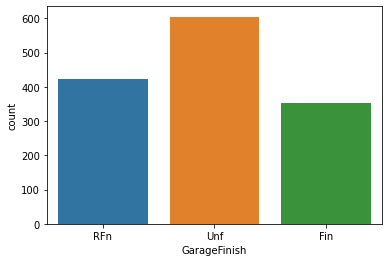

In [24]:
### checking GarageFinish column for data imputation
sns.countplot(df_train.GarageFinish)

In [25]:
### best to impute GarageFinish with mode values
df_train.GarageFinish.fillna(df_train.GarageFinish.mode()[0] , inplace=True)
df_train.GarageFinish.isnull().sum()

0

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

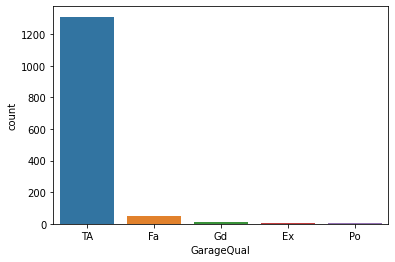

In [26]:
### checking GarageQual column for data imputation
sns.countplot(df_train.GarageQual)

In [27]:
### best to impute GarageCond with mode values
df_train.GarageQual.fillna(df_train.GarageQual.mode()[0] , inplace=True)
df_train.GarageQual.isnull().sum()

0

In [28]:
### merging non-TA values as others in both Train and Test set
df_train.GarageQual = df_train.GarageQual.apply(lambda x: "Others" if x != 'TA' else x)
df_train.GarageQual.value_counts(dropna=False)

TA        1392
Others      68
Name: GarageQual, dtype: int64

In [29]:
df_test.GarageQual = df_test.GarageQual.apply(lambda x: "Others" if x != 'TA' else x)
df_test.GarageQual.value_counts(dropna=False)

TA        1293
Others     166
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

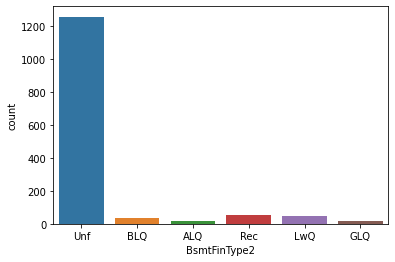

In [30]:
### checking BsmtFinType2 column for data imputation
sns.countplot(df_train.BsmtFinType2)

In [31]:
### best to impute BsmtFinType2 with mode values
df_train.BsmtFinType2.fillna(df_train.BsmtFinType2.mode()[0] , inplace=True)
df_train.BsmtFinType2.isnull().sum()

0

In [32]:
### merging non-Unf values as others in both Train and Test set
df_train.BsmtFinType2 = df_train.BsmtFinType2.apply(lambda x: "Others" if x != 'Unf' else x)
df_train.BsmtFinType2.value_counts(dropna=False)

Unf       1294
Others     166
Name: BsmtFinType2, dtype: int64

In [33]:
df_test.BsmtFinType2 = df_test.BsmtFinType2.apply(lambda x: "Others" if x != 'Unf' else x)
df_test.BsmtFinType2.value_counts(dropna=False)

Unf       1237
Others     222
Name: BsmtFinType2, dtype: int64

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

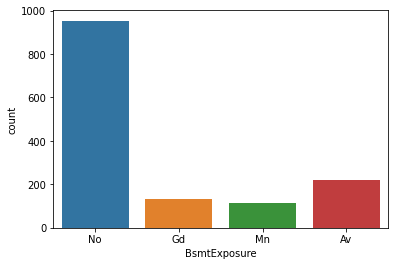

In [34]:
### checking BsmtExposure column for data imputation
sns.countplot(df_train.BsmtExposure)

In [35]:
### best to impute BsmtExposure with mode values
df_train.BsmtExposure.fillna(df_train.BsmtExposure.mode()[0] , inplace=True)
df_train.BsmtExposure.isnull().sum()

0

In [36]:
df_test.BsmtExposure.fillna(df_test.BsmtExposure.mode()[0] , inplace=True)
df_test.BsmtExposure.isnull().sum()

0

In [37]:
### merging non-NO values as others in both Train and Test set
df_train.BsmtExposure = df_train.BsmtExposure.apply(lambda x: "Others" if x != 'No' else x)
df_train.BsmtExposure.value_counts(dropna=False)

No        991
Others    469
Name: BsmtExposure, dtype: int64

In [38]:
df_test.BsmtExposure = df_test.BsmtExposure.apply(lambda x: "Others" if x != 'No' else x)
df_test.BsmtExposure.value_counts(dropna=False)

No        995
Others    464
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

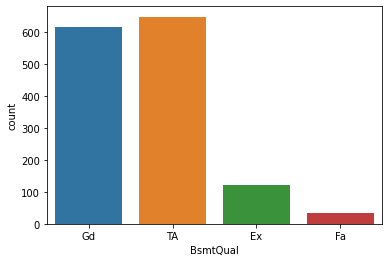

In [39]:
### checking BsmtQual column for data imputation
sns.countplot(df_train.BsmtQual)

In [40]:
### best to impute BsmtQual with mode values
df_train.BsmtQual.fillna(df_train.BsmtQual.mode()[0] , inplace=True)
df_train.BsmtQual.isnull().sum()

0

In [41]:
df_test.BsmtQual.fillna(df_test.BsmtQual.mode()[0] , inplace=True)
df_test.BsmtQual.isnull().sum()

0

In [42]:
### merging Ex & Fa values as others in both Train and Test set
df_train.BsmtQual = df_train.BsmtQual.apply(lambda x: "Others" if (x == 'Ex' or x == 'Fa') else x)
df_train.BsmtQual.value_counts(dropna=False)

TA        686
Gd        618
Others    156
Name: BsmtQual, dtype: int64

In [43]:
df_test.BsmtQual = df_test.BsmtQual.apply(lambda x: "Others" if (x == 'Ex' or x == 'Fa') else x)
df_test.BsmtQual.value_counts(dropna=False)

TA        678
Gd        591
Others    190
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

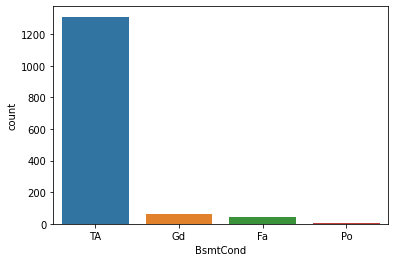

In [44]:
### checking BsmtCond column for data imputation
sns.countplot(df_train.BsmtCond)

In [45]:
### best to impute BsmtQual with mode values
df_train.BsmtCond.fillna(df_train.BsmtCond.mode()[0] , inplace=True)
df_train.BsmtCond.isnull().sum()

0

In [46]:
df_test.BsmtCond.fillna(df_test.BsmtCond.mode()[0] , inplace=True)
df_test.BsmtCond.isnull().sum()

0

In [47]:
### merging non-TA values as others in both Train and Test set
df_train.BsmtCond = df_train.BsmtCond.apply(lambda x: "Others" if x != 'TA' else x)
df_train.BsmtCond.value_counts(dropna=False)

TA        1348
Others     112
Name: BsmtCond, dtype: int64

In [48]:
df_test.BsmtCond = df_test.BsmtCond.apply(lambda x: "Others" if x != 'TA' else x)
df_test.BsmtCond.value_counts(dropna=False)

TA        1340
Others     119
Name: BsmtCond, dtype: int64

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

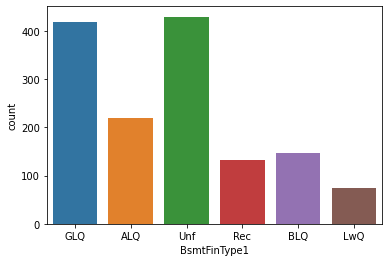

In [49]:
### checking BsmtFinType1 column for data imputation
sns.countplot(df_train.BsmtFinType1)

In [50]:
### best to impute BsmtFinType1 with mode values
df_train.BsmtFinType1.fillna(df_train.BsmtFinType1.mode()[0] , inplace=True)
df_train.BsmtFinType1.isnull().sum()

0

In [51]:
df_test.BsmtFinType1.fillna(df_test.BsmtFinType1.mode()[0] , inplace=True)
df_test.BsmtFinType1.isnull().sum()

0

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

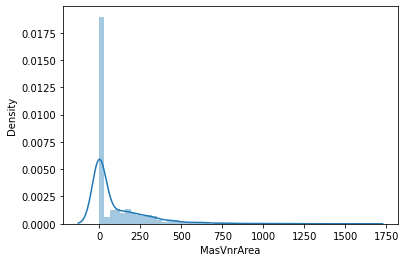

In [52]:
### checking MasVnrArea column for data imputation
sns.distplot(df_train.MasVnrArea)

<AxesSubplot:xlabel='MasVnrArea'>

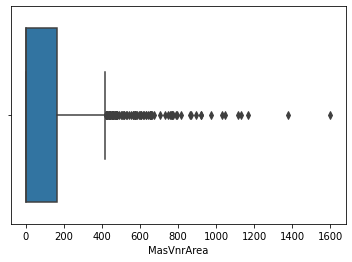

In [53]:
sns.boxplot(df_train.MasVnrArea)

In [54]:
### best to impute MasVnrArea with median values
df_train.MasVnrArea.fillna(df_train.MasVnrArea.median() , inplace=True)
df_train.MasVnrArea.isnull().sum()

0

In [55]:
df_test.MasVnrArea.fillna(df_test.MasVnrArea.median() , inplace=True)
df_test.MasVnrArea.isnull().sum()

0

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

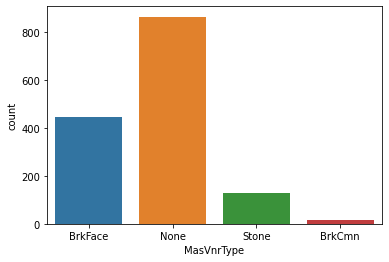

In [56]:
### checking MasVnrType column for data imputation
sns.countplot(df_train.MasVnrType)

In [57]:
### best to impute MasVnrType with mode values
df_train.MasVnrType.fillna(df_train.MasVnrType.mode()[0] , inplace=True)
df_train.MasVnrType.isnull().sum()

0

In [58]:
df_test.MasVnrType.fillna(df_test.MasVnrType.mode()[0] , inplace=True)
df_test.MasVnrType.isnull().sum()

0

In [59]:
### merging Stone & BrkCmn values as others in both Train and Test set
df_train.MasVnrType = df_train.MasVnrType.apply(lambda x: "Others" if (x == 'Stone' or x == 'BrkCmn') else x)
df_train.MasVnrType.value_counts(dropna=False)

None       872
BrkFace    445
Others     143
Name: MasVnrType, dtype: int64

In [60]:
df_test.MasVnrType = df_test.MasVnrType.apply(lambda x: "Others" if (x == 'Stone' or x == 'BrkCmn') else x)
df_test.MasVnrType.value_counts(dropna=False)

None       894
BrkFace    434
Others     131
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='count'>

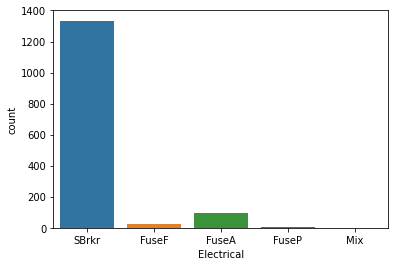

In [61]:
### checking Electrical column for data imputation
sns.countplot(df_train.Electrical)

In [62]:
### best to impute Electrical with mode values
df_train.Electrical.fillna(df_train.Electrical.mode()[0] , inplace=True)
df_train.Electrical.isnull().sum()

0

In [63]:
df_test.Electrical.fillna(df_test.Electrical.mode()[0] , inplace=True)
df_test.Electrical.isnull().sum()

0

In [64]:
### merging non-SBrkr values as others in both Train and Test set
df_train.Electrical = df_train.Electrical.apply(lambda x: "Others" if x != 'SBrkr' else x)
df_train.Electrical.value_counts(dropna=False)

SBrkr     1335
Others     125
Name: Electrical, dtype: int64

In [65]:
df_test.Electrical = df_test.Electrical.apply(lambda x: "Others" if x != 'SBrkr' else x)
df_test.Electrical.value_counts(dropna=False)

SBrkr     1337
Others     122
Name: Electrical, dtype: int64

In [66]:
### Final check of columns after
null_df = round((df_train.isnull().sum() *100 / df_train.shape[0]),2).sort_values(ascending=False)
null_df[null_df > 0]

Series([], dtype: float64)

In [67]:
## converting YearBuilt columns into buckets
buckets = [-np.inf , 1900,1950,2000,np.inf]
labels = ["1800-1900","1900-1950","1950-2000","2000-2020"]
df_train["YearBuilt_Bucket"] = pd.cut(df_train["YearBuilt"] , buckets ,labels =labels)
df_test["YearBuilt_Bucket"] = pd.cut(df_test["YearBuilt"] , buckets ,labels =labels)

In [68]:
df_train.drop(columns="YearBuilt" , inplace=True)
df_test.drop(columns="YearBuilt" , inplace=True)

In [69]:
## converting YearRemodAdd columns into buckets
buckets = [1950,1975,2000,np.inf]
labels = ["1950-1975","1975-2000","2000-2020"]
df_train["YearRemodAdd_Bucket"] = pd.cut(df_train["YearRemodAdd"] , buckets ,labels =labels)
df_test["YearRemodAdd_Bucket"] = pd.cut(df_test["YearRemodAdd"] , buckets ,labels =labels)

In [70]:
df_train.drop(columns="YearRemodAdd" , inplace=True)
df_test.drop(columns="YearRemodAdd" , inplace=True)

In [71]:
## converting GarageYrBlt columns into buckets
buckets = [-np.inf,1950,1975,2000,np.inf]
labels = ["Before-1950","1950-1975","1975-2000","2000-2020"]
df_train["GarageYrBlt_Bucket"] = pd.cut(df_train["GarageYrBlt"] , buckets ,labels =labels)
df_test["GarageYrBlt_Bucket"] = pd.cut(df_test["GarageYrBlt"] , buckets ,labels =labels)

In [72]:
df_train.drop(columns="GarageYrBlt" , inplace=True)
df_test.drop(columns="GarageYrBlt" , inplace=True)

In [73]:
### converting yr columns to objects as they must be treated a categorical
df_train[["YearBuilt_Bucket","YrSold","YearRemodAdd_Bucket","GarageYrBlt_Bucket"]] = df_train[["YearBuilt_Bucket","YrSold","YearRemodAdd_Bucket","GarageYrBlt_Bucket"]].astype("object")
df_test[["YearBuilt_Bucket","YrSold","YearRemodAdd_Bucket","GarageYrBlt_Bucket"]] = df_test[["YearBuilt_Bucket","YrSold","YearRemodAdd_Bucket","GarageYrBlt_Bucket"]].astype("object")

In [74]:
### converting CentralAir "Y" to 1 and "N" to 0
df_train["CentralAir"] = df_train["CentralAir"].apply(lambda x: 1 if x=="Y" else 0)
df_test["CentralAir"] = df_test["CentralAir"].apply(lambda x: 1 if x=="Y" else 0)

In [75]:
### converting other columns to objects as they must be treated a categorical
column_to_object = ["Fireplaces","TotRmsAbvGrd","OverallQual","OverallCond","CentralAir","MoSold","GarageCars","MSSubClass","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr"]
df_train[column_to_object] = df_train[column_to_object].astype("object")
df_test[column_to_object] = df_test[column_to_object].astype("object")

In [76]:
### dropping the ID column
df_train.drop(columns="Id" , inplace=True)

<br>
<br>

### Data Standardisation & Dummy column 

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
### getting list of numerical columns
columns_to_scale = df_train.select_dtypes(["int64","float64"]).columns
columns_to_scale

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [80]:
### excluding the target column
columns_to_scale = columns_to_scale[:-1]

In [81]:
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

In [82]:
### creating X & Y train
y_train = df_train.pop("SalePrice")
x_train = df_train

In [83]:
### getting list of categorical columns
columns_to_dummy = df_train.select_dtypes(["object"]).columns
columns_to_dummy

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearBuilt_Bucket',
       'YearRemodAdd_Bucket', 'GarageYrBlt_Bucket'],
      dtype='object')

In [84]:
### create dummy for both test and train
dummy = pd.get_dummies(x_train[columns_to_dummy] , drop_first=True)
x_train.drop(columns=columns_to_dummy , inplace=True)
x_train = pd.concat([x_train,dummy] , axis=1)

dummy = pd.get_dummies(df_test[columns_to_dummy] , drop_first=True)
df_test.drop(columns=columns_to_dummy , inplace=True)
df_test = pd.concat([df_test,dummy] , axis=1)


In [85]:
x_train.shape

(1460, 285)

In [86]:
x_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Others,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Others,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_1,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_TA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,M

<br>
<br>

### Model Creation

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
folds = StratifiedKFold(n_splits=5 , random_state=42 , shuffle=True)

In [89]:
lm = LinearRegression()

In [90]:
rfecv =RFECV(estimator=lm , cv=folds , scoring="r2" , n_jobs=-1)
rfecv.fit(x_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=LinearRegression(), n_jobs=-1, scoring='r2')

In [91]:
rfecv.n_features_

26

In [92]:
rfe = RFE(lm , rfecv.n_features_)
rfe = rfe.fit(x_train,y_train)

In [112]:
best_features = list(x_train.columns[rfe.support_])
best_features

['LotArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'Condition2_PosN',
 'Condition2_RRAe',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Heating_OthW',
 'Functional_Sev']

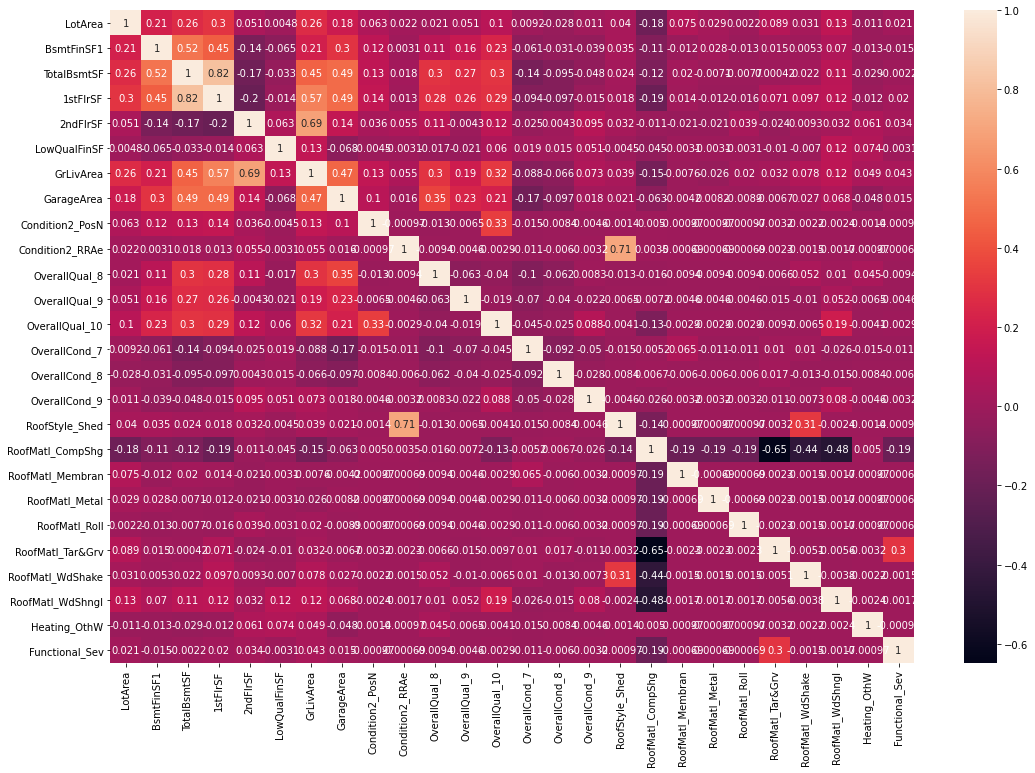

In [94]:
plt.figure(figsize=(18,12))
sns.heatmap(x_train[best_features].corr(),annot=True)
plt.show()

In [95]:
### creating function to create model and display stats
def build_OLS_model(x_train , y_train , features):
    x_train_rfe = x_train[features]
    x_train_rfe = sm.add_constant(x_train_rfe)
    ols = sm.OLS(y_train, x_train_rfe)
    ols_model = ols.fit()
    print(ols_model.summary())
    print("\n")
    vif= pd.DataFrame()
    vif["Features"] = x_train_rfe.columns
    vif["VIF"] = [variance_inflation_factor(x_train_rfe.values , i) for i in range(x_train_rfe.shape[1])]
    vif["VIF"] = round(vif["VIF"] , 2)
    vif = vif.sort_values(by="VIF" , ascending=False)
    print(vif)

In [113]:
### Model-1
build_OLS_model(x_train,y_train,best_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:52:06   Log-Likelihood:                -17224.
No. Observations:                1460   AIC:                         3.450e+04
Df Residuals:                    1434   BIC:                         3.464e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.736e+05   3.67e+04  

In [114]:
### removing column with high VIF : 2ndFlrSF
best_features.remove("2ndFlrSF")
### Model-2
build_OLS_model(x_train,y_train,best_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:52:14   Log-Likelihood:                -17224.
No. Observations:                1460   AIC:                         3.450e+04
Df Residuals:                    1434   BIC:                         3.464e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.736e+05   3.67e+04  

In [115]:
### removing column with high VIF : RoofMatl_WdShake
best_features.remove("RoofMatl_WdShake")
### Model-3
build_OLS_model(x_train,y_train,best_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     227.4
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:52:36   Log-Likelihood:                -17399.
No. Observations:                1460   AIC:                         3.485e+04
Df Residuals:                    1435   BIC:                         3.498e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.186e+05   1.77e+04  

In [116]:
### removing column with high p-value : OverallCond_8
best_features.remove("OverallCond_8")
### Model-4
build_OLS_model(x_train,y_train,best_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.0
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -17400.
No. Observations:                1460   AIC:                         3.485e+04
Df Residuals:                    1436   BIC:                         3.497e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.176e+05   1.77e+04  

In [117]:
### removing column with high p-value : OverallCond_9 
best_features.remove("OverallCond_9")
### Model-5
build_OLS_model(x_train,y_train,best_features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     247.5
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:53:18   Log-Likelihood:                -17401.
No. Observations:                1460   AIC:                         3.485e+04
Df Residuals:                    1437   BIC:                         3.497e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.176e+05   1.77e+04  

In [118]:
### here is the final list of features having low VIF and P-Value
best_features

['LotArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'Condition2_PosN',
 'Condition2_RRAe',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_7',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Heating_OthW',
 'Functional_Sev']

In [119]:
### checking the best_features in test set and dropping if not present
cols_remove = []
for col in  best_features:
    if col not in df_test.columns:
        print("\n Removed:",col)
        cols_remove.append(col)
        
for col in cols_remove:
    best_features.remove(col)

best_features


 Removed: Condition2_RRAe

 Removed: RoofMatl_CompShg

 Removed: RoofMatl_Membran

 Removed: RoofMatl_Metal

 Removed: RoofMatl_Roll

 Removed: Heating_OthW


['LotArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'Condition2_PosN',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_7',
 'RoofStyle_Shed',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Functional_Sev']

In [120]:
### checking the best_features in test set and dropping if not present
cols_consider = []
for col in  x_train.columns:
    if col in df_test.columns:
        cols_consider.append(col)


In [121]:
### creating the final OLS model
x_train_final = sm.add_constant(x_train[best_features])
ols = sm.OLS(y_train,x_train_final)
ols_model_best = ols.fit()


### Creating non-liner model

In [122]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

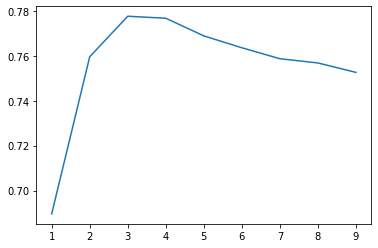

In [123]:
### checking with KNN
r2_scores =[]
for n in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=n)
    r2_scores.append(cross_val_score(knn,x_train[cols_consider] , y_train,n_jobs=-1, cv=folds, scoring="r2").mean())
    
plt.plot(range(1,10) , r2_scores)    
plt.show()

In [124]:
### best to keep K=3
knn_best = KNeighborsRegressor(n_neighbors=3)
knn_best.fit(x_train[cols_consider] , y_train)

KNeighborsRegressor(n_neighbors=3)

In [125]:
### checking with Random forest
rf = RandomForestRegressor(random_state=42 , n_jobs=-1)
params = {
    "n_estimators": range(10,200,5),
    "max_depth": range(3,15),
    "min_samples_split" : range(3,10),
    "min_samples_leaf" :range(2,15),
    "max_features": range(5,150,5)
}

rsCV = RandomizedSearchCV(estimator=rf , random_state=42  , param_distributions= params , n_jobs=-1 , cv=folds , n_iter= 400)
rsCV.fit(x_train[cols_consider] , y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 15),
                                        'max_features': range(5, 150, 5),
                                        'min_samples_leaf': range(2, 15),
                                        'min_samples_split': range(3, 10),
                                        'n_estimators': range(10, 200, 5)},
                   random_state=42)

In [126]:
rf_best = rsCV.best_estimator_

In [127]:
### best r2 score from Random Forest
rsCV.best_score_

0.8386400631388321

<br>
<br>

### Creating Multi Estimator

In [128]:
def estimate(x_test, best_features,cols_consider):
    x_test_sm = sm.add_constant(x_test[best_features])
    final_estimate = pd.DataFrame({"OLS":ols_model_best.predict(x_test_sm) , "KNN" : knn_best.predict(x_test[cols_consider]) , "RF" : rf_best.predict(x_test[cols_consider]) })
    return final_estimate

In [129]:
### handling null values in test set
null_df = round((df_test.isnull().sum() *100 / df_test.shape[0]),2).sort_values(ascending=False)
null_df[null_df > 0]

LotFrontage    15.56
BsmtFinSF1      0.07
BsmtFinSF2      0.07
BsmtUnfSF       0.07
TotalBsmtSF     0.07
GarageArea      0.07
dtype: float64

In [130]:
### imputing all with median values
df_test["TotalBsmtSF"] = df_test["TotalBsmtSF"].fillna(df_test["TotalBsmtSF"].median())
df_test["GarageArea"] = df_test["GarageArea"].fillna(df_test["GarageArea"].median())
df_test["BsmtFinSF1"] = df_test["BsmtFinSF1"].fillna(df_test["BsmtFinSF1"].median())
df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_test["LotFrontage"].median())
df_test["BsmtFinSF2"] = df_test["BsmtFinSF2"].fillna(df_test["BsmtFinSF2"].median())
df_test["BsmtUnfSF"] = df_test["BsmtUnfSF"].fillna(df_test["BsmtUnfSF"].median())

In [131]:
### show multi estimator values
y_test_predicted = estimate(df_test,best_features,cols_consider)
y_test_predicted["Avg_Predict"] = y_test_predicted.mean(axis=1)
df_test["SalePrice"] = y_test_predicted["Avg_Predict"]
y_test_predicted.head()

,OLS,KNN,RF,Avg_Predict
0,148581.947082,128800.000000,133265.027513,136882.324865
1,160051.704928,143833.333333,156822.660586,153569.232949
2,182407.726589,179133.333333,181772.481740,181104.513887
3,175829.526431,187300.000000,181722.872289,181617.466240
4,213552.510126,201833.333333,193730.555169,203038.799543


In [132]:
### final data to submit
df_test[["Id","SalePrice"]].to_csv("submission.csv")